In [ ]:
!pip install netcdf4

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filename = 'COT.nc'
data1 = nc.Dataset(filename)

In [ ]:
f = 'CTH.nc'
data2 = nc.Dataset(f)

In [ ]:
f = 'VI_B.nc'
data3 = nc.Dataset(f)
f = 'IR.nc'
data4 = nc.Dataset(f)

In [ ]:
data3.variables.keys(),data4.variables.keys()

(dict_keys(['image_pixel_values']), dict_keys(['image_pixel_values']))

In [ ]:
vi_b = np.array(data3.variables['image_pixel_values'][:].data)
vi_b

array([[183, 185, 186, ..., 278, 277, 279],
       [183, 185, 185, ..., 278, 277, 278],
       [186, 183, 185, ..., 278, 279, 278],
       ...,
       [208, 209, 210, ..., 208, 209, 209],
       [208, 208, 209, ..., 209, 209, 209],
       [208, 208, 208, ..., 209, 208, 208]], dtype=uint16)

In [ ]:
ir = np.array(data4.variables['image_pixel_values'][:].data)
ir

array([[6216, 6216, 6217, ..., 7222, 7239, 7233],
       [6212, 6216, 6217, ..., 7242, 7239, 7251],
       [6212, 6216, 6217, ..., 7242, 7259, 7251],
       ...,
       [3959, 3959, 4033, ..., 3791, 3798, 3793],
       [3956, 3959, 3985, ..., 3791, 3794, 3791],
       [3957, 3956, 3968, ..., 3793, 3794, 3786]], dtype=uint16)

In [ ]:
np.isnan(vi_b).sum()

0

In [ ]:
np.isnan(ir).sum()

0

In [ ]:
cot = np.array(data1.variables['COT'][:].data)
cth = np.array(data2.variables['CTH'][:].data)

In [ ]:
cot[1700]

array([12.2 , 11.88,  9.28, ..., 12.13,  4.93,  2.59], dtype=float32)

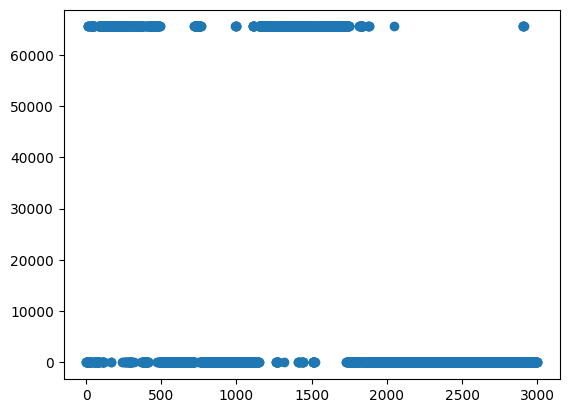

In [ ]:
plt.scatter(range(3000), cth[1700])
plt.show()

In [ ]:
import pandas as pd

In [ ]:
cot_df = pd.DataFrame(cot)
cth_df = pd.DataFrame(cth)

NameError: ignored

In [ ]:
cot_df

In [ ]:
cot = np.array(cot_df[cot_df < 150])
cth = np.array(cth_df[cth_df != 65535.00]) * 1000

In [ ]:
cot

In [ ]:
pd.DataFrame(cth)

In [ ]:
cth.shape

(2600, 3000)

In [ ]:
cot.shape

(2600, 3000)

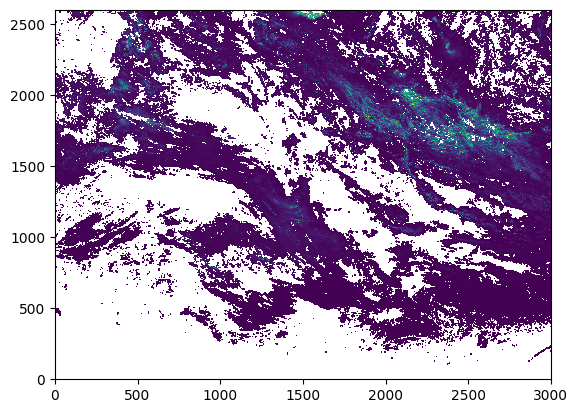

In [ ]:
plt.pcolor(cot)
plt.show()

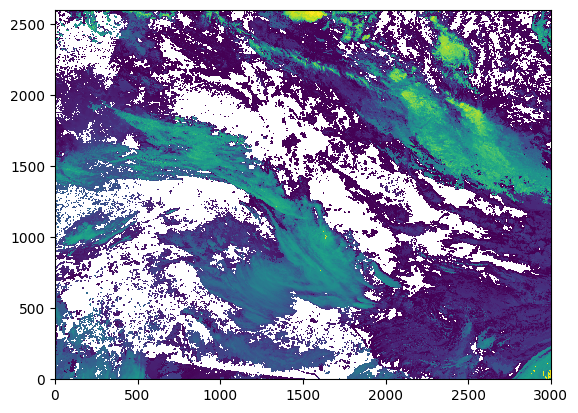

In [ ]:
plt.pcolor(cth)
plt.show()

In [ ]:
clh = cth - cot

In [ ]:
clh.shape

(2600, 3000)

In [ ]:
cth.max(),cot.max()

(nan, nan)

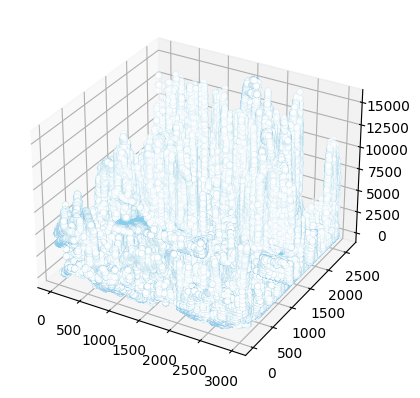

In [ ]:
ax= plt.figure().add_subplot(projection = '3d')
for i in range(2600):
    ax.scatter(np.linspace(1,3000,3000),i,clh[i][0:3000], c='white', alpha=0.5, edgecolors='skyblue', linewidths=0.1)
    ax.scatter(np.linspace(1,3000,3000),i,cth[i][0:3000]*1000, c='white', alpha=0.5, edgecolors='skyblue', linewidth=0.1)

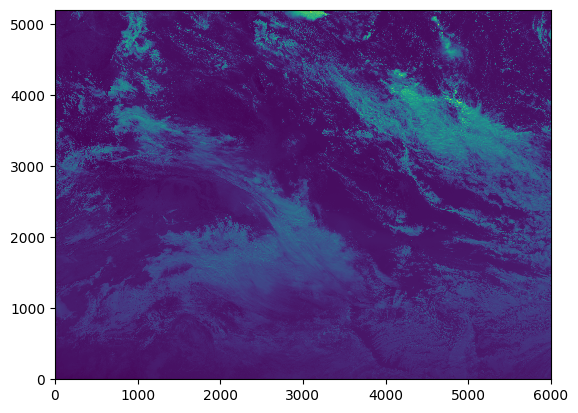

In [ ]:
plt.pcolor(vi_b)

plt.show()

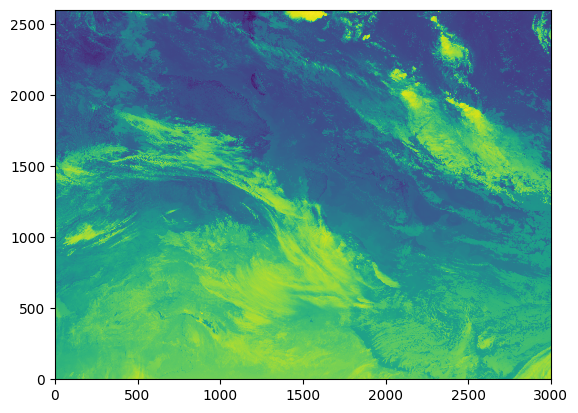

In [ ]:
plt.pcolor(ir)
plt.show()

In [ ]:
cth.min(), cot.min()

(nan, nan)

In [ ]:
clh.max(), clh.min()

(nan, nan)

In [ ]:
cot_nonnull = cot[~np.isnan(cot)]
cot_nonnull.shape

(2188926,)

In [ ]:
cth_nonnull = cth[~np.isnan(cot)]
cth_nonnull.shape

(2188926,)

In [ ]:
vi_b.shape

(5200, 6000)

In [ ]:
ir.shape

(2600, 3000)

In [ ]:
vi_b

array([[183, 185, 186, ..., 278, 277, 279],
       [183, 185, 185, ..., 278, 277, 278],
       [186, 183, 185, ..., 278, 279, 278],
       ...,
       [208, 209, 210, ..., 208, 209, 209],
       [208, 208, 209, ..., 209, 209, 209],
       [208, 208, 208, ..., 209, 208, 208]], dtype=uint16)

In [ ]:
vi_b_nonnull = np.zeros((2600, 3000), 'float64')
vi_b_nonnull.shape

(2600, 3000)

In [ ]:
latitude = np.zeros((2600, 3000), 'int64')
latitude.shape

(2600, 3000)

In [ ]:
for i in range(0, 2600):
    for j in range(0, 3000):
        value = (vi_b[i * 2][j * 2] + vi_b[i * 2][j * 2 + 1] + vi_b[i * 2 + 1][j * 2] + vi_b[i * 2 + 1][j * 2 + 1]) / 4
        vi_b_nonnull[i][j] = value
        latitude[i][j] = i

vi_b_nonnull

array([[184.  , 185.75, 187.  , ..., 276.5 , 278.  , 277.75],
       [184.75, 185.  , 186.75, ..., 277.75, 278.25, 278.5 ],
       [185.25, 184.25, 185.  , ..., 277.75, 279.5 , 278.75],
       ...,
       [209.  , 209.25, 213.  , ..., 208.75, 210.  , 209.25],
       [208.75, 209.75, 210.25, ..., 208.25, 209.25, 209.  ],
       [208.  , 208.5 , 210.25, ..., 208.5 , 209.  , 208.5 ]])

In [ ]:
latitude

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [2597, 2597, 2597, ..., 2597, 2597, 2597],
       [2598, 2598, 2598, ..., 2598, 2598, 2598],
       [2599, 2599, 2599, ..., 2599, 2599, 2599]], dtype=int64)

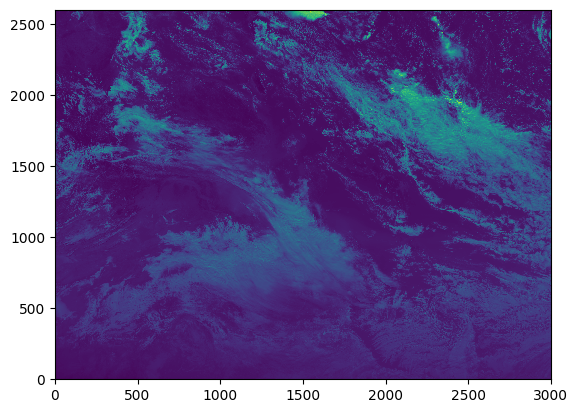

In [ ]:
vi_b_nonnull_2D = vi_b_nonnull
plt.pcolor(vi_b_nonnull_2D)
plt.show()

In [ ]:
vi_b_nonnull.shape

(2600, 3000)

In [ ]:
latitude.shape

(2600, 3000)

In [ ]:
vi_b_nonnull = vi_b_nonnull[~np.isnan(cot)]

In [ ]:
ir_nonnull = ir[~np.isnan(cot)]

In [ ]:
vi_b_nonnull.shape

(2188926,)

In [ ]:
ir_nonnull.shape

(2188926,)

In [ ]:
latitude_nonnull = latitude[~np.isnan(cot)]
latitude_nonnull

array([ 106,  107,  107, ..., 2599, 2599, 2599], dtype=int64)

In [ ]:
clh_nonnull = clh[~np.isnan(cot)]
clh_nonnull

array([5369.74   , 5549.7397 , 5369.74   , ..., 1387.68   ,  728.14996,
        728.14996], dtype=float32)

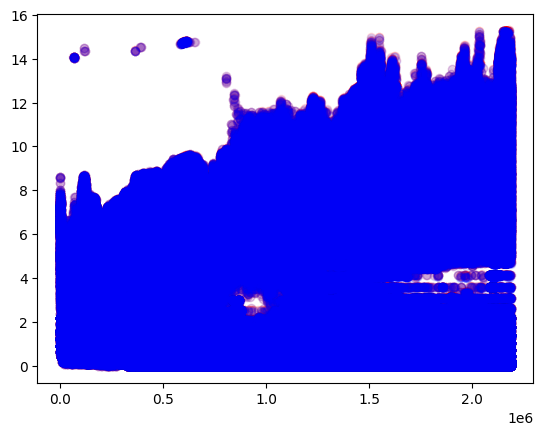

In [ ]:
plt.scatter(range(2188926), cth_nonnull, c='r', alpha=0.1)
plt.scatter(range(2188926), clh_nonnull, c='b', alpha=0.1)
plt.show()

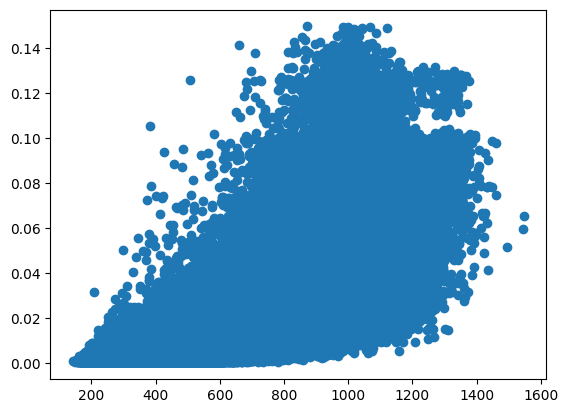

In [ ]:
plt.scatter(vi_b_nonnull, cot_nonnull)
plt.show()

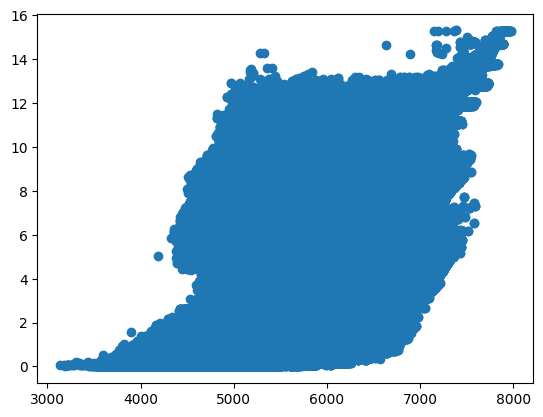

In [ ]:
plt.scatter(ir_nonnull, cth_nonnull)
plt.show()

In [ ]:
import seaborn as sns

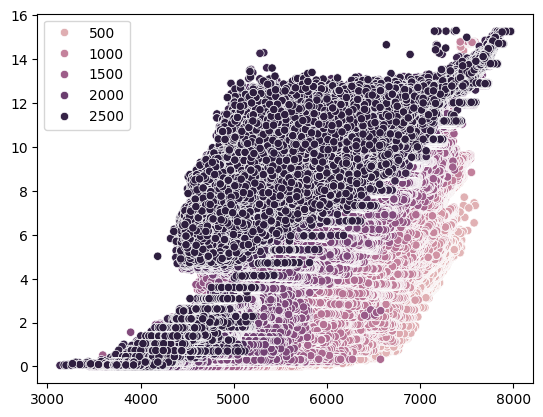

In [ ]:
sns.scatterplot(x=ir_nonnull, y=cth_nonnull, hue=latitude_nonnull)
plt.show()

In [ ]:
vi_b_nonnull = vi_b_nonnull.reshape(-1, 1)
vi_b_nonnull

array([[329. ],
       [341. ],
       [342. ],
       ...,
       [255.5],
       [259. ],
       [242.5]])

In [ ]:
latitude_nonnull = latitude_nonnull.reshape(-1, 1)

In [ ]:
latitude_nonnull

array([[ 106],
       [ 107],
       [ 107],
       ...,
       [2599],
       [2599],
       [2599]], dtype=int64)

In [ ]:
ir_nonnull =ir_nonnull.reshape(-1,1)

In [ ]:
cot_nonnull = cot_nonnull.reshape(-1, 1)
cth_nonnull = cth_nonnull.reshape(-1, 1)

In [ ]:
cot_nonnull

array([[0.26     ],
       [0.26     ],
       [0.26     ],
       ...,
       [2.32     ],
       [1.8499999],
       [1.8499999]], dtype=float32)

In [ ]:
cth_nonnull

array([[5370.     ],
       [5549.9995 ],
       [5370.     ],
       ...,
       [1390.     ],
       [ 729.99994],
       [ 729.99994]], dtype=float32)

In [ ]:
x1 = np.column_stack((ir_nonnull, latitude_nonnull))
y1 = cth_nonnull

In [ ]:
x2 = np.column_stack((vi_b_nonnull, latitude_nonnull))
y2 = cot_nonnull

In [ ]:
x1

array([[6882,  106],
       [6811,  107],
       [6882,  107],
       ...,
       [4394, 2599],
       [4243, 2599],
       [4243, 2599]], dtype=int64)

In [ ]:
y1

array([[5370.     ],
       [5549.9995 ],
       [5370.     ],
       ...,
       [1390.     ],
       [ 729.99994],
       [ 729.99994]], dtype=float32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)
print(x1)

[[7.74333540e-01 0.00000000e+00]
 [7.59661087e-01 4.01123145e-04]
 [7.74333540e-01 4.01123145e-04]
 ...
 [2.60177723e-01 1.00000000e+00]
 [2.28972928e-01 1.00000000e+00]
 [2.28972928e-01 1.00000000e+00]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y1)
y1 = scaler.transform(y1)
print(y1)

[[0.35098043]
 [0.3627451 ]
 [0.35098043]
 ...
 [0.09084968]
 [0.04771242]
 [0.04771242]]


In [ ]:
from sklearn.model_selection import train_test_split
train_data1, test_data1, train_target1, test_target1 = train_test_split(x1, y1)

In [ ]:
from sklearn.model_selection import train_test_split
train_data2, test_data2, train_target2, test_target2 = train_test_split(x2, y2)

In [ ]:
print(train_data1.shape, test_data1.shape)
print(train_target1.shape, test_target1.shape)

(1641694, 2) (547232, 2)
(1641694, 1) (547232, 1)


In [ ]:
print(train_data2.shape, test_data2.shape)
print(train_target2.shape, test_target2.shape)

(1641694, 2) (547232, 2)
(1641694, 1) (547232, 1)


# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linearmodel1 = LinearRegression(fit_intercept=True)
linearmodel1.fit(train_data1, train_target1)
w1 = linearmodel1.coef_
b1 = linearmodel1.intercept_
print(w1)
print(b1)

[[1.28054076 0.66008861]]
[-0.77308694]


In [ ]:
linearmodel1.score(test_data1, test_target1)
linearmodel1.score(train_data1, train_target1)

0.8724895926774758

In [ ]:
linearmodel1.predict([[3000, 1500]])

array([[4830.98210307]])

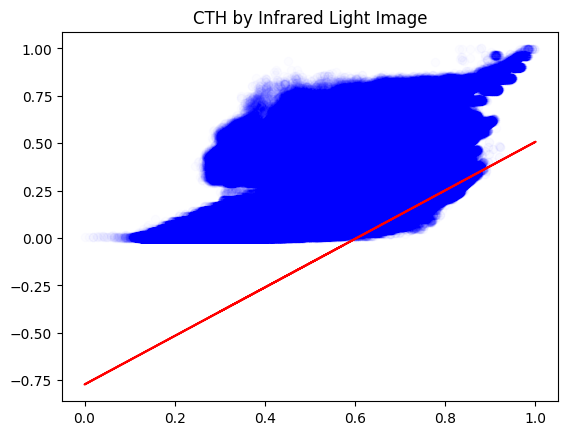

In [ ]:
plt.scatter(train_data1[:, 0], train_target1[:, 0], c='b', alpha=0.01)
plt.plot(train_data1[:, 0], w1[0, 0] * train_data1[:, 0] + b1, c='r')
plt.title('CTH by Infrared Light Image')
plt.show()

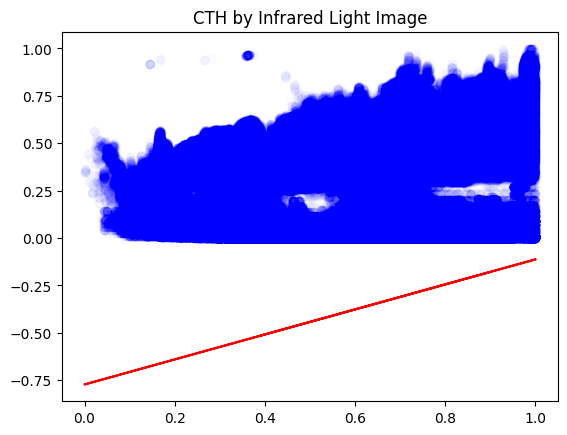

In [ ]:
plt.scatter(train_data1[:, 1], train_target1[:, 0], c='b', alpha=0.01)
plt.plot(train_data1[:, 1], w1[0, 1] * train_data1[:, 1] + b1, c='r')
plt.title('CTH by Infrared Light Image')
plt.show()

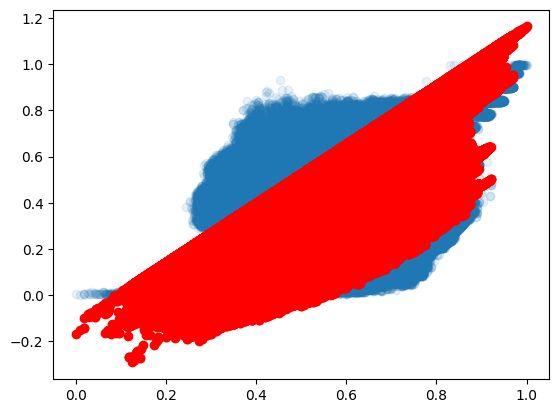

In [ ]:
plt.scatter(train_data1[:, 0], train_target1[:, 0], alpha=0.1)
plt.scatter(train_data1[:, 0], linearmodel1.predict(train_data1)[:, 0], c='r')
plt.show()

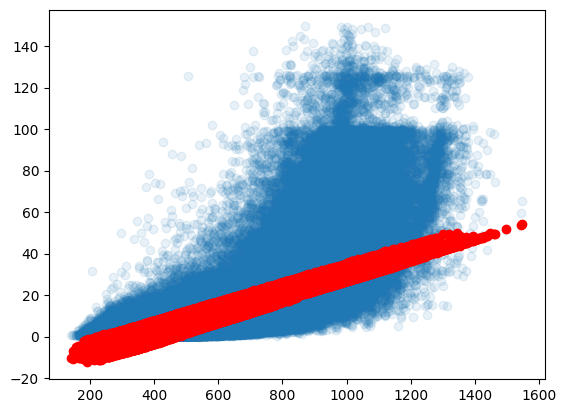

In [ ]:
plt.scatter(train_data[:, 1], train_target[:, 1], alpha=0.1)
plt.scatter(train_data[:, 1], linearmodel.predict(train_data)[:, 1], c='r')
plt.show()

# Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
deep_model_CTH = Sequential()
deep_model_CTH.add(Dense(64, activation='relu', input_dim=2))
deep_model_CTH.add(Dense(128, activation='relu'))
deep_model_CTH.add(Dropout(0.2))
deep_model_CTH.add(Dense(32, activation='relu'))
deep_model_CTH.add(Dense(1))
deep_model_CTH.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
deep_model_CTH.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                192       
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 32)                4128      
                                                                 
 dense_53 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
deep_model_CTH.fit(train_data1,train_target1,epochs=5)

Epoch 1/5
 3319/51303 [>.............................] - ETA: 1:36 - loss: 0.0063 - accuracy: 0.0586

KeyboardInterrupt: 

In [ ]:
deep_model_CTH.evaluate(test_data1, test_target1)

17101/17101 [==============================] - 15s 864us/step - loss: 13.8095 - accuracy: 0.9420


[13.809492111206055, 0.9420227408409119]

In [ ]:
test_target1

array([[8.1700001e+00, 1.0599999e-03],
       [5.3199997e+00, 5.0000002e-04],
       [1.6600000e+00, 4.2999999e-04],
       ...,
       [9.9999998e-03, 3.5999998e-04],
       [0.0000000e+00, 3.0300000e-03],
       [3.2200000e+00, 2.1800001e-03]], dtype=float32)

In [ ]:
deep_model_CTH.predict(test_data1)

17101/17101 [==============================] - 11s 660us/step


array([[6768.4023 ,    0.     ],
       [ 917.47156,    0.     ],
       [ 518.9017 ,    0.     ],
       ...,
       [ 227.27249,    0.     ],
       [4694.557  ,    0.     ],
       [3597.0232 ,    0.     ]], dtype=float32)